## Final report guidelines

### 1) Summary of problem statement, data and findings

Every good abstract describes succinctly what was intended at the outset, and summarizes findings and implications.

### Problem Statement

The European MNC bank faces a significant challenge with customer churn across its branches in France, Germany, and Spain. High churn rates lead to revenue losses and increased customer acquisition costs. Understanding why customers leave is critical to addressing this issue. Factors such as competition, customer dissatisfaction, changing banking needs, and poor service could contribute to churn. The bank seeks to predict which customers are likely to leave to take proactive steps, such as offering personalized services, improving engagement, or addressing pain points. By reducing churn, the bank aims to improve customer retention and strengthen its market position.

### Dataset and domain
* The Dataset belongs to Banking domain. It contains 10000 rows and 18 columns

### Data Dictionary 

| # | FIELDS | DESCRIPTION
| -- | ------------ | --------------------------------------- |
| 1 | RowNumber  | Corresponds to the record (row) number  | 
| 2 | CustomerId  | ID of the customer that uniquely identifies a customer  | 
| 3 | Surname  | Surname of the customer  | 
| 4 | CreditScore  | Credit Score of the Customer  | 
| 5 | Geography  | Customer’s Location  | 
| 6 | Gender  | Gender of the Customer  | 
| 7 | Age  | Age of the Customer  | 
| 8 | Tenure  | Number of years that the customer has been a client of the bank  | 
| 9 | Balance  | Balance of the Customer  | 
| 10 | NumOfProducts  | Number of products that the customer has purchased through the bank  | 
| 11 | HasCrCard  | An indicator denoting whether the customer has a credit card  | 
| 12 | IsActiveMember  | An indicator denoting  whether the customer is Active  | 
| 13 | EstimatedSalary  | Estimated Salary of the Customer  |  
| 14 | Exited  | An indicator denoting  whether or not the customer left the bank. ( Target variable )  | 
| 15 | Complain  | An indicator denoting  whether the customer has complaint or not  | 
| 16 | Satisfaction Score  | Score provided by the customer for their complaint resolution.  | 
| 17 | Card Type  | Type of card the customer holds | 
| 18 | Points Earned  |Points earned by the customer for using credit card  | 


### Findings and implications

Through the use of logistic regression, we have established a strong baseline model that offers reliable predictions on customer churn risk. As per the logistic regression model, our base line model, we infer the following:

**Recall for the minority class** for the training dataset and test dataset: 100% and 100%. 
Using 10-fold cross validation: 99.8% with standard deviation of 0.003

**Pseudo R square (McFadden R square):** 97.93%

**Significant Independent variables:** 
* Complain (Odds ratio:567302)
* Age (Odds ratio: 3.040042)
* IsActiveMember (Odds ratio: 0.214312)

The target variable. **Exited** are infliuenced by the two independent variables. Complian and Age.  

### 2) Overview of the final process

Briefly describe your problem solving methodology. Include information about the salient features of your data, data pre-processing steps, the algorithms you used, and how you combined techniques.

### 3) Step-by-step walk through of the solution

Describe the steps you took to solve the problem. What did you find at each stage, and how did it inform the next steps? Build up to the final solution.

In [11]:
import  os
import  warnings
warnings.filterwarnings("ignore")
folder   = r'E:\DSE-FT-C-May24-G5\Final'
os.chdir(folder)
os.getcwd()

'E:\\DSE-FT-C-May24-G5\\Final'

### Measure execution time

In [13]:
from   datetime import datetime 
import datetime as dt

start_time = datetime.now()

### Import Libraries

In [15]:
import numpy                    as     np
import seaborn                  as     sns
import matplotlib.pyplot        as     plt
import plotly.express           as     plx
import pandas                   as     pd
import statistics
import statsmodels.api          as     sm
import sklearn.metrics          as     metrics
from   sklearn.metrics          import recall_score
import warnings
warnings.filterwarnings("ignore")

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.ensemble         import  RandomForestClassifier
from   sklearn.tree             import _tree

from scipy import stats
from sklearn.model_selection    import train_test_split,cross_val_score,cross_val_predict
from sklearn.model_selection    import  StratifiedKFold
from sklearn.linear_model       import LogisticRegression
from sklearn.preprocessing      import StandardScaler,LabelEncoder
from sklearn.preprocessing      import RobustScaler
from sklearn.metrics            import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,f1_score,classification_report

from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.tree                          import DecisionTreeClassifier,plot_tree
from statsmodels.stats.stattools           import durbin_watson
from sklearn.preprocessing                 import FunctionTransformer

In [16]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.5.1


In [17]:
from   sklearn.feature_selection   import  RFECV
from   sklearn.feature_selection   import  RFE
from   sklearn                     import  metrics
from   sklearn.pipeline            import  Pipeline
from   sklearn                     import  preprocessing   
from   sklearn.model_selection     import  cross_val_score
from   sklearn.model_selection     import  RepeatedStratifiedKFold
from   sklearn.ensemble            import  RandomForestClassifier

In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore")
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [19]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [20]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [21]:
def calculate_VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    #calculate VIF for each explanatory variable
    vif             =  pd.DataFrame()
    vif['VIF']      =  [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] =  X.columns

    #view VIF for each explanatory variable 
    return vif

In [22]:
 def remove_high_vif(X, thresh = 5):
    from statsmodels.stats.outliers_influence import variance_inflation_factor   
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [23]:
def  report_null(df):
    counts_list          =  list(zip(df.isnull().sum(),round((df.isnull().sum() * 100) / df.shape[0],2)))
    cols                 =  df.columns
    c                    =  df.isnull().sum()
    p                    =  round((df.isnull().sum() * 100) / df.shape[0],2)
    count_df             =  pd.DataFrame({'Column' : cols, 'NA Count' : c, 'NA Percentage' : p })
    filtered_df          =  count_df[(count_df['NA Count'] > 0)]
    return filtered_df

In [24]:
def identify_outliers(df, var):
    # Interquartile Range (IQR)

    # Calculate the upper and lower limits
    Q1                     =    df[var].quantile(0.25)
    Q3                     =    df[var].quantile(0.75)
    IQR                    =    Q3 - Q1  
    low                    =    Q1 - (1.5 * IQR)
    
    lower                  =    abs(Q1 - 1.5 * IQR)
    upper                  =    abs(Q3 + (1.5 * IQR))
    outlier_upper          =    df[df[var] > upper].count()[1]
    outlier_lower          =    df[df[var] < low].count()[1]
    
    m                      =    np.min(df[var])
    mX                     =    np.max(df[var])
    Zero_l                 =    df.loc[df[var]==0,var].sum()
    
    print("\nFeature :{} Lower_quartile: {} ,Upper_quartile: {} ".format(var,lower, upper))
    print("\nMax value: {} Minimum value: {}".format(mX, m))
    print("\nGreater than UpperIQR : {}, Less than lower_IQR : {} ,  zero_count:  {}".format(outlier_upper,outlier_lower,Zero_l))
    
    outliers_present       =   outlier_upper > 0 or outlier_lower > 0
    if outliers_present:
       print("\nVariable {} has outliers".format(var))
    else:
       print("\nVariable {} has NO outliers".format(var))        
   
    sns.boxplot(data=df, x= var)
    titlex = 'Boxplot for ' + var
    plt.title(titlex)
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
def chk_chisq(i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df['Exited'])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
    
    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)    
 
    print("\n{}".format(txt)) 
    print("\n ChiSq Stat: {0}, P value: {1}".format(res[0], res[1]))

In [26]:
def Shapiro_Wilk(df, col1):
    from scipy.stats import shapiro
    x          =  df[col1]
    stat, p    =  shapiro(x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
     print('{} Probably Gaussian'.format(col1))
    else:
     print('{} Probably not Gaussian'.format(col1))

In [27]:
def pointbiserialr(df, col1, y):
    x   =  df[col1]
    stat, p    =  stats.pointbiserialr(y, x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
     print('{} There is no correlation'.format(col1))
    else:
     print('{} There is a correlation'.format(col1))

## Load the Dataset

In [29]:
df        =  pd.read_csv(r'../Data/Customer-Churn-Records.csv')

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [31]:
print("The dataset has ",df.shape[0]," rows and ",df.shape[1]," columns")
df.info()

The dataset has  10000  rows and  18  columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfac

We observe that the ID variables and customer personal details such as RowNumber, CustomerId and Surname etc. will not add value to our analysis and hence we need to remove them for our analysis.

In [33]:
drop_cols   =  ['RowNumber', 'CustomerId','Surname']
df.drop(columns = drop_cols, inplace = True)

In [34]:
df_num = df.select_dtypes(exclude=['string','object'])
print("Number of categorical columns {}".format(df_num.shape[1]))
print("Numeric columns {}".format(df_num.columns))

Number of categorical columns 12
Numeric columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')


The following *Twelve* (12) are categorical variables where each one is a code or an indicator:

1) CreditScore
2) Age
3) Tenure
4) Balance
5) NumOfProducts
6) HasCrCard
7) IsActiveMember
8) EstimatedSalary
9) Exited
10) Complain
11) Satisfaction Score
12) Point Earned

In [36]:
df_cat = df.select_dtypes(exclude = ['float64','int64'])
print("Number of numeric columns {}".format(df_cat.shape[1]))
print("Numeric columns {}".format(df_cat.columns))

Number of numeric columns 3
Numeric columns Index(['Geography', 'Gender', 'Card Type'], dtype='object')


### Variable categorization (count of numeric and categorical)

The following *three* (3) are numeric variables:

1) Geography
2) Gender
3) Card Type

### 2. Overview of the final process

The flow of the solving the problem is as follows, <br>
Understand the dataset,its description and problem statement completely. <br>
Analyse the data with five point summary and gain insights on the numerical and categorical columns. <br>
Employ different visualization technique and understand the patterns better. <br>
Identify and handle missing values, outliers, inconsistencies, and duplicates in your dataset. This step is crucial to ensure data quality and prevent errors in your model. <br>
Transform your data into a suitable format for machine learning algorithms. This might involve normalization, standardization, feature engineering, or handling categorical variables. <br>
Check if there is a presence of multicollinearity in the data.<br>
Check for the outliers in the data and decide on how to treat the outliers.<br>
Perform different statistical analysis for the dependent and independent variables based on the different type of the independent variable.<br>
Data Preprocessing is done next to make the data to be effectively understood and to avoid bais of the algorithm towards one independent features.<br>
Feature Selection is employed next to list out the features that are significant and select those only for effective prediction of the fraud .<br>
After selecting the features , the different models that can be implemented is taken under discussion and base model is constructed .<br>
If there is imbalance in the target variable , nesscessary sampling technique is employed and the different models is analysed based on different metrics such as Recall,precision F1 score , weighted F1 score .<br>
Based on our criticality of type 1 and type 2 errors the metric to be considered is carefully chosen accordingly based on the criticallity of the error and domain expertise.<br>



### Five point summary

In [42]:
df.describe(exclude = "object").T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [43]:
df.describe(include="object").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


In [44]:
df['Exited']    =    df['Exited'].astype('object')
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

### Inference for Categorical Variables:

1) Geography: Most common type is "France", followed by others.

2) Gender: Gender of most of the customers in Male.

3) Card Type: Most of the customers hold the card type, DIAMOND.	


### Overall: Categorical variables exhibit varying levels of cardinality. Some variables like "Geography" and "Gender" have high cardinality. The distribution of customer data across different categories provides insights into customer characteristics.

In [46]:
backup_data=df.copy()

In [47]:
print("The number of duplicated rows is ",df.duplicated().sum())

The number of duplicated rows is  0


### Observation

There are no duplicated rows

### Check for null values

In [50]:
report_null(df)

,Column,NA Count,NA Percentage


## There are no missing values.

## 3. Step-by-step walk through of the solution

In [53]:
num_columns  =  df.describe(exclude = "object").columns

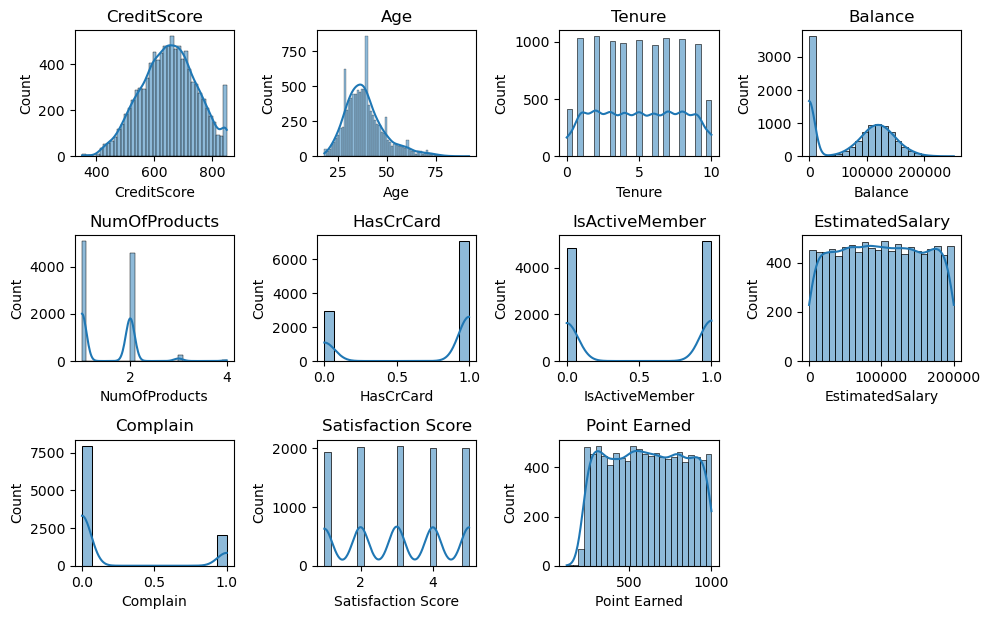

In [54]:
# Univariate Analysis
plt.figure(figsize=(10,12))
t=1
for i in num_columns.to_list():
    plt.subplot(6,4,t)
    sns.histplot(df[i],kde=True)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()
    

## Bivariate Analysis

### A) Categorical variables


In [56]:
cat_columns =  df.describe(include="object").columns

In [57]:
c           =  ['Geography', 'Gender', 'Card Type']

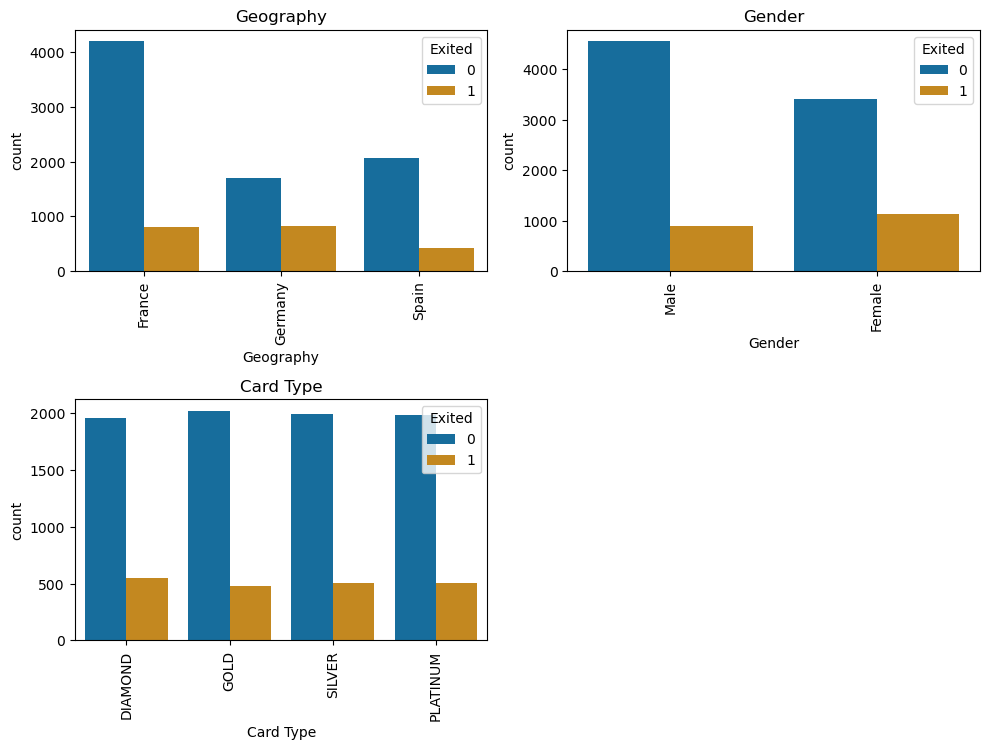

In [58]:
plt.figure(figsize=(10,14))
t=1
for i in c:
    plt.subplot(4,2,t)
    sns.countplot(data=df,x=i,order=df[i].value_counts().index,palette='colorblind', hue = "Exited")
    plt.title(i)
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

### B) Numerical variables

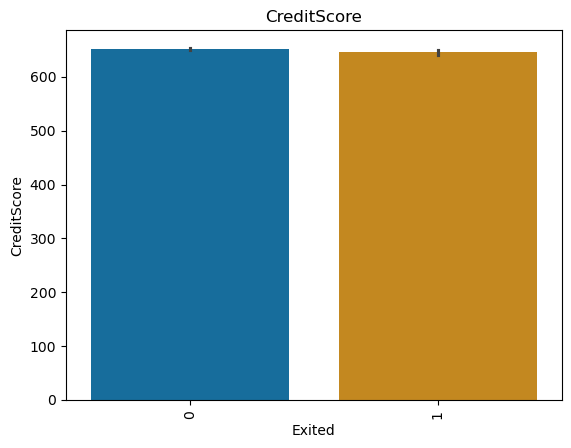

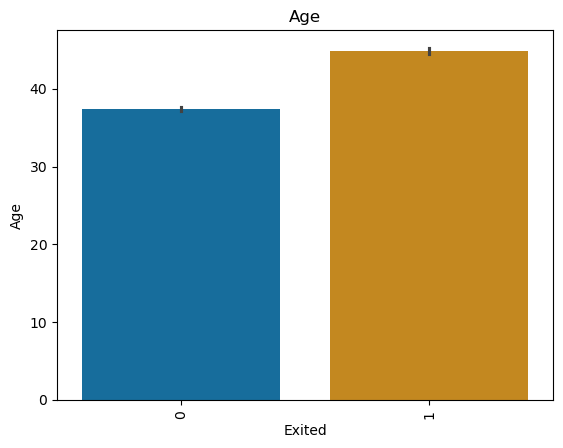

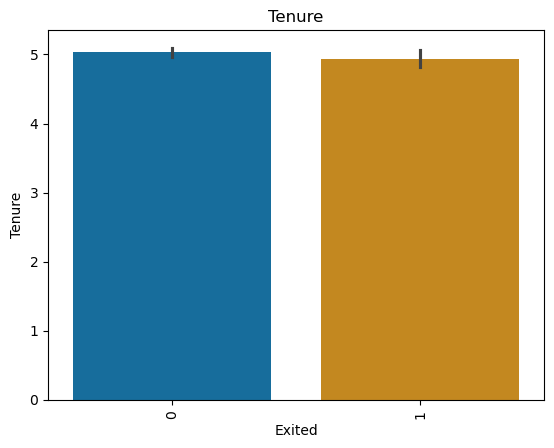

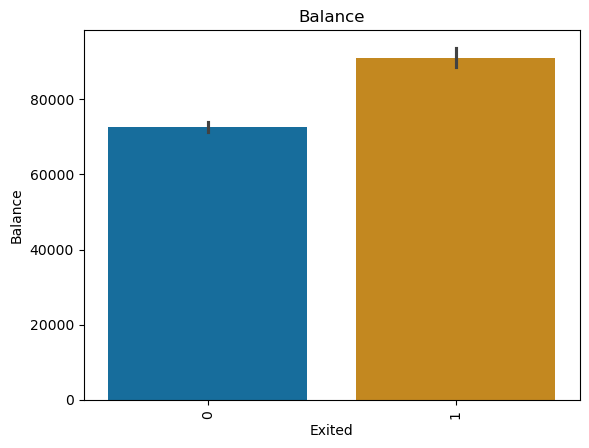

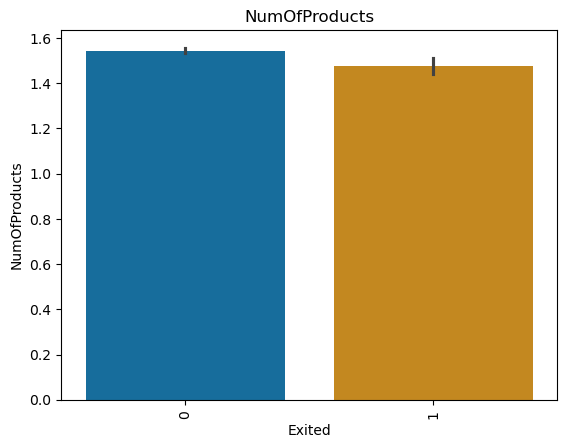

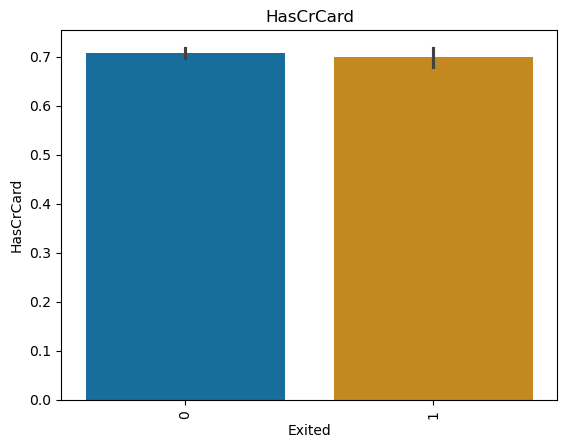

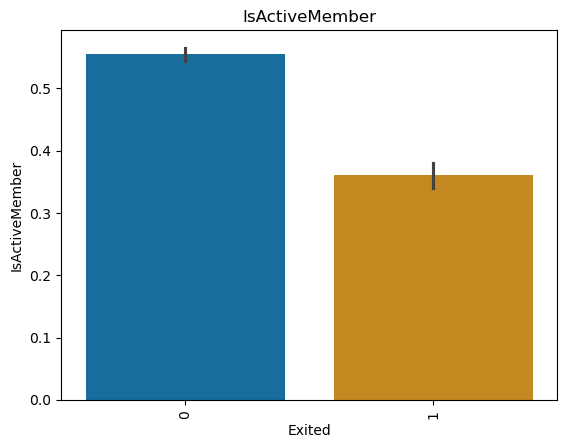

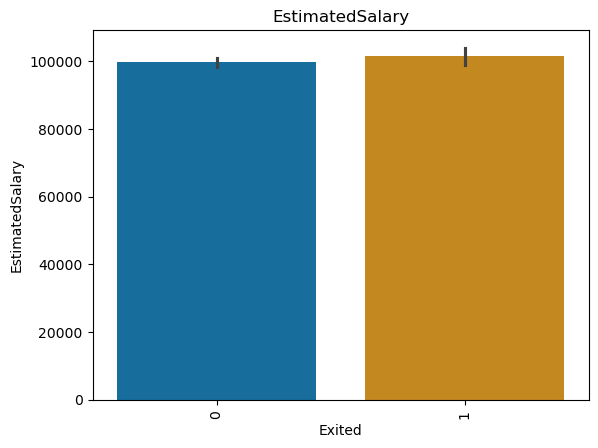

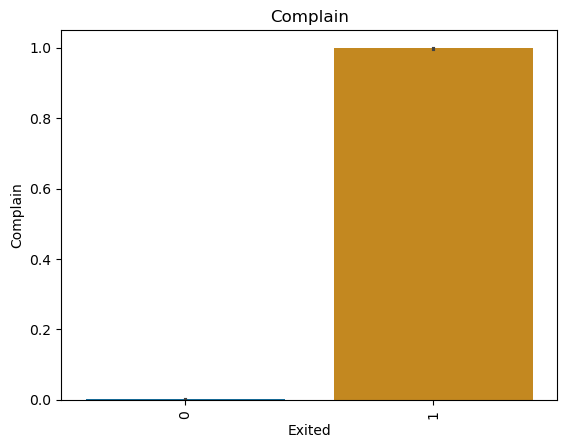

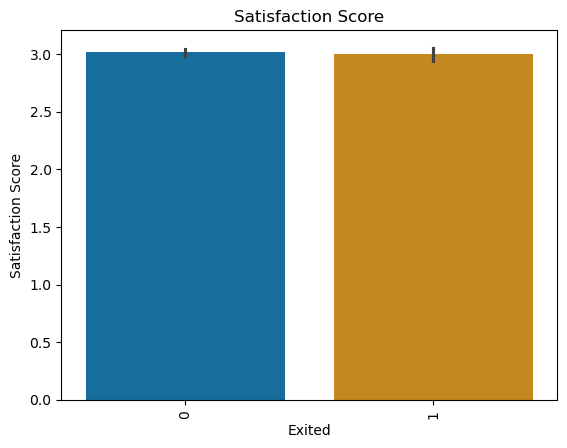

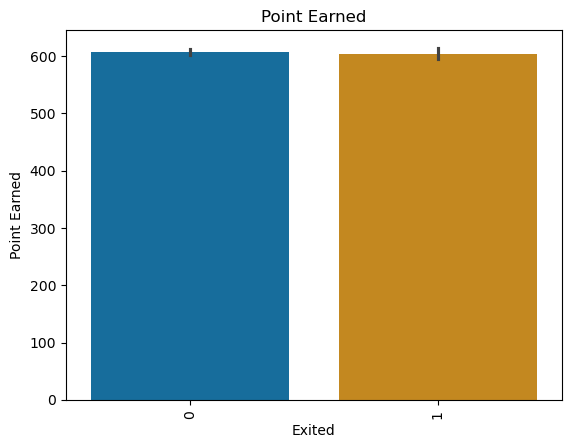

In [60]:
# Bivariate Analysis
#t=1
for i in num_columns:
    #plt.subplot(6,4,t)
    sns.barplot(y=df[i],x=df['Exited'],palette='colorblind')
    plt.xticks(rotation = 90)
    plt.title(i)
    #t+=1
#plt.tight_layout()
    plt.show()

## Multivariate Analysis

In [62]:
cnv    =  [ 'Age', 'Balance','EstimatedSalary'] #Continuous numerical variables
ODim   =  ['Complain',  'Tenure', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'Satisfaction Score', 'Geography', 'Gender', 'Card Type']

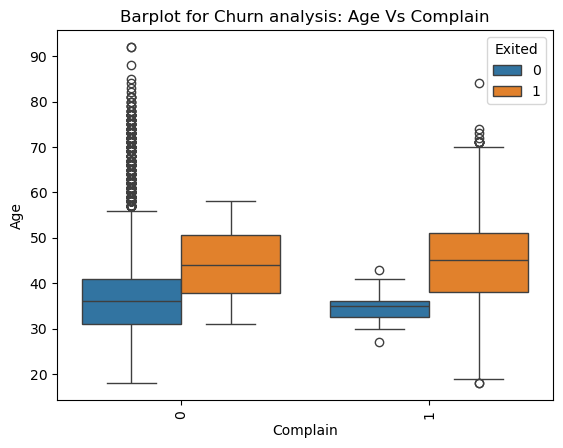

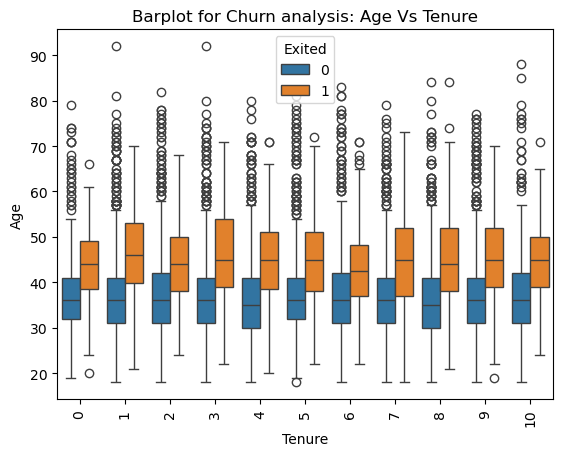

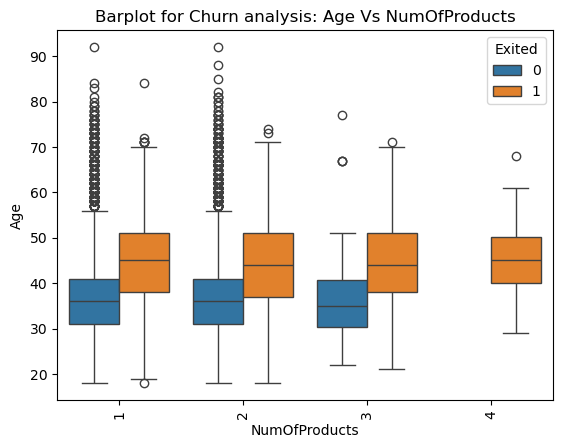

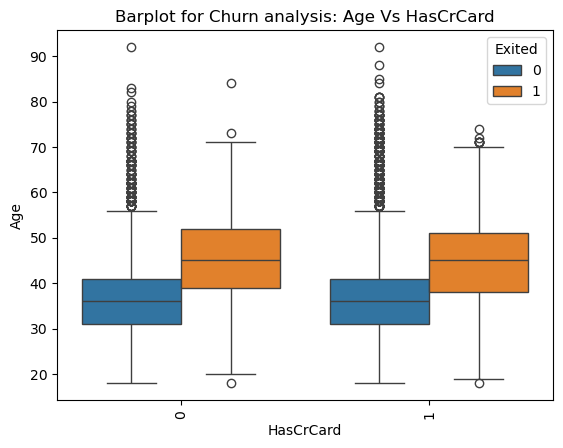

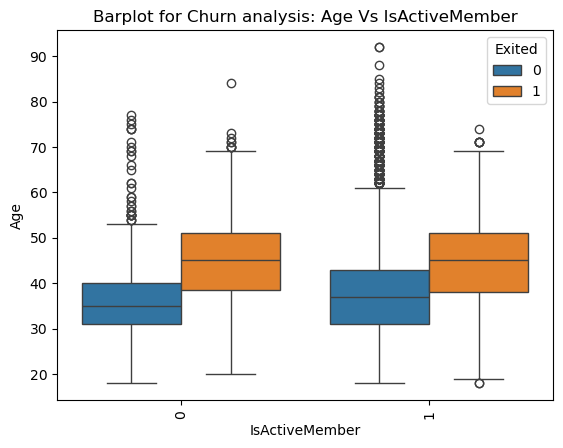

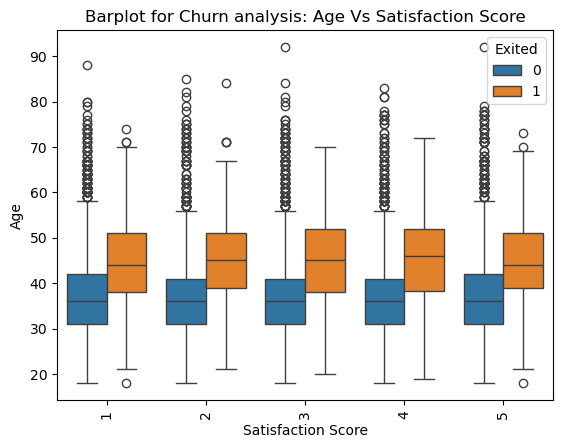

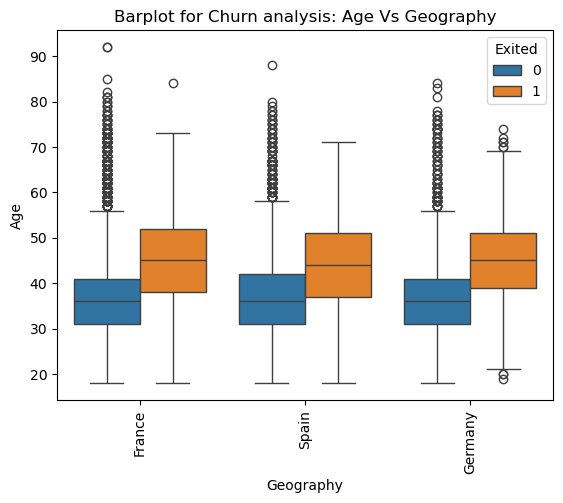

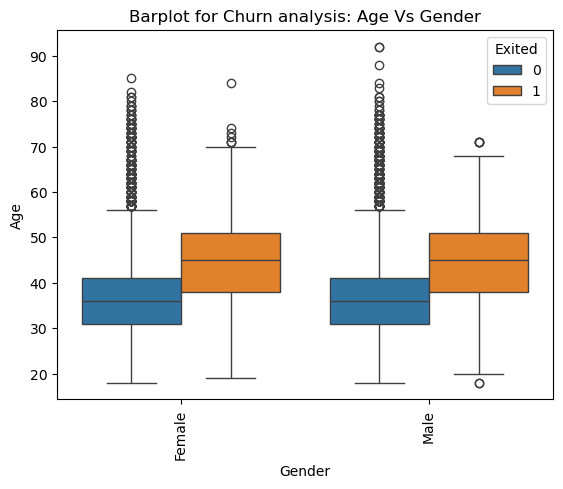

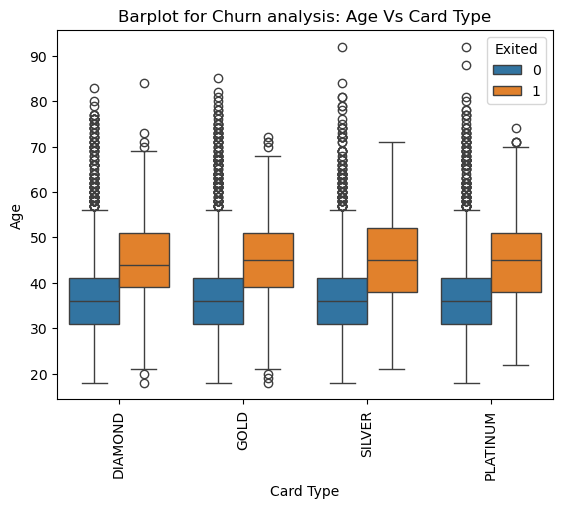

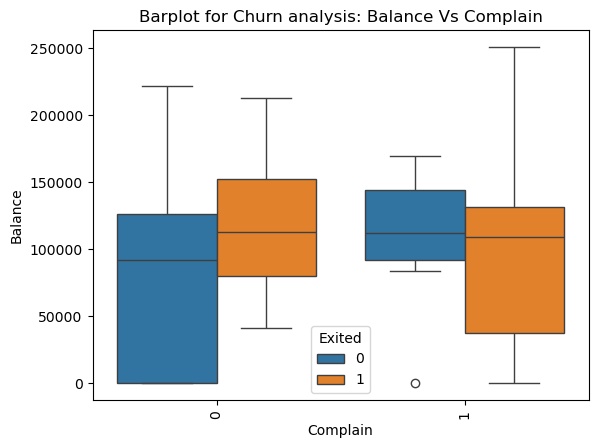

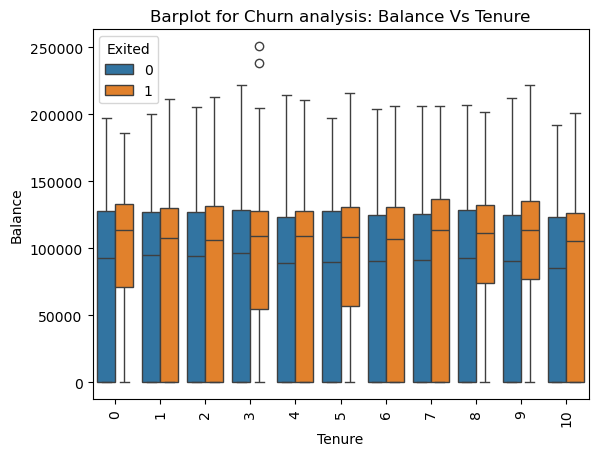

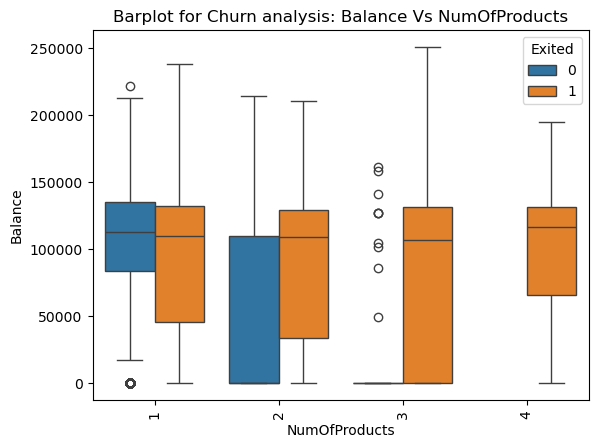

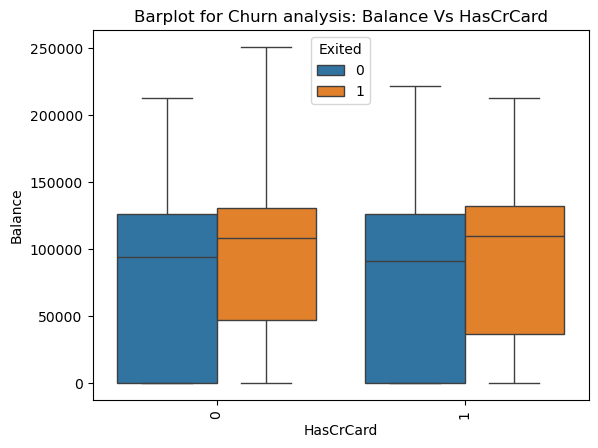

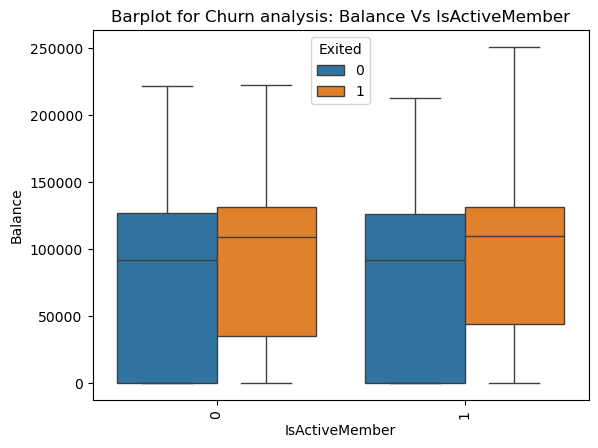

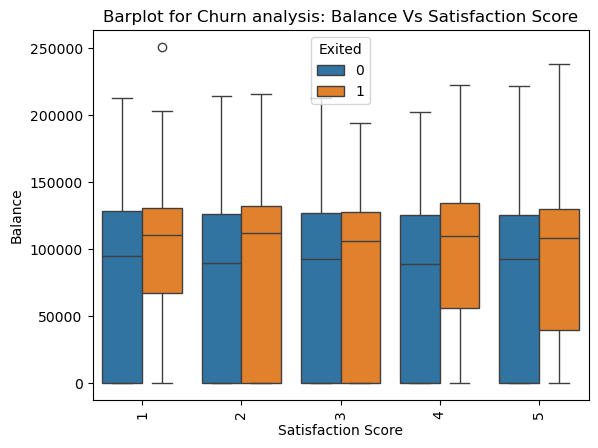

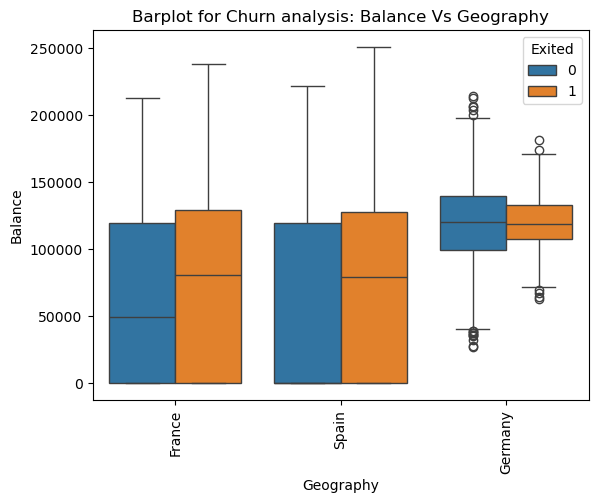

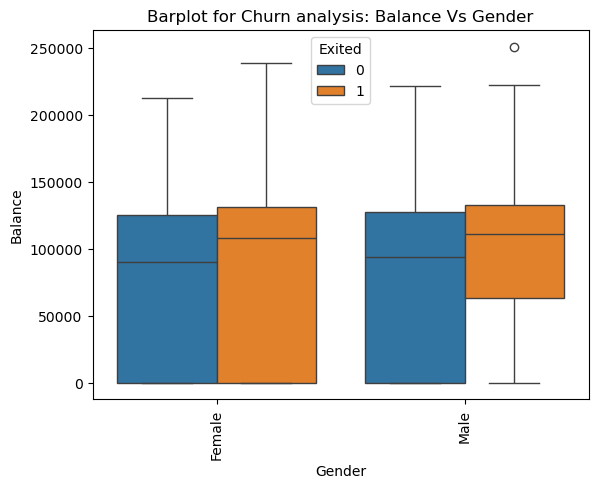

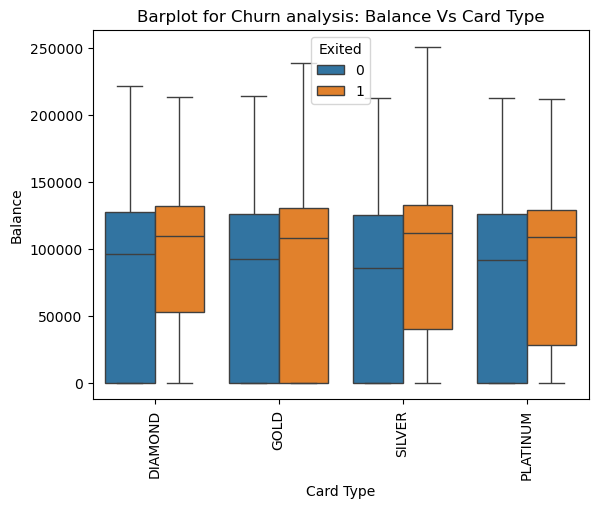

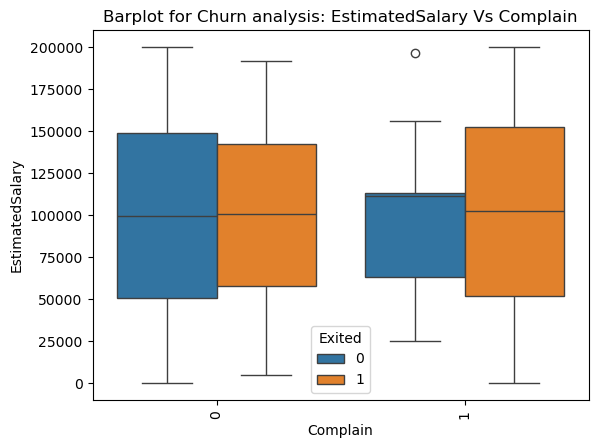

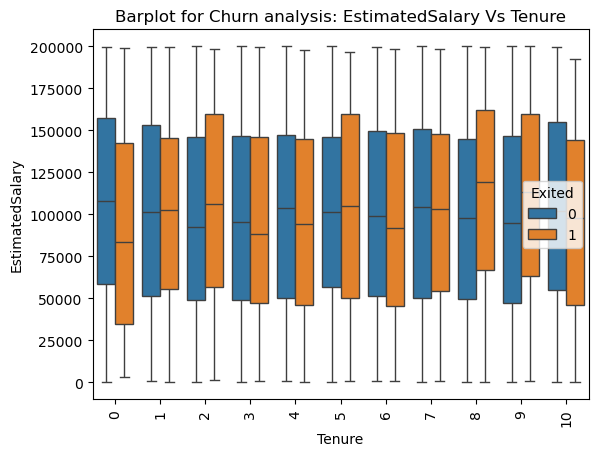

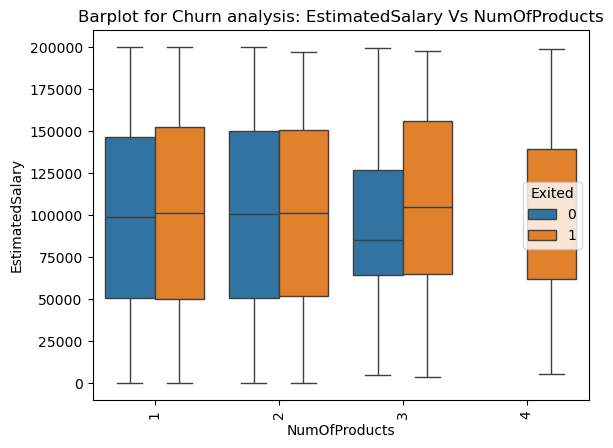

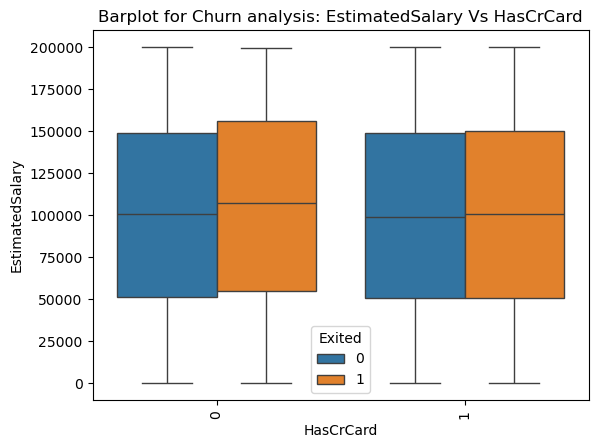

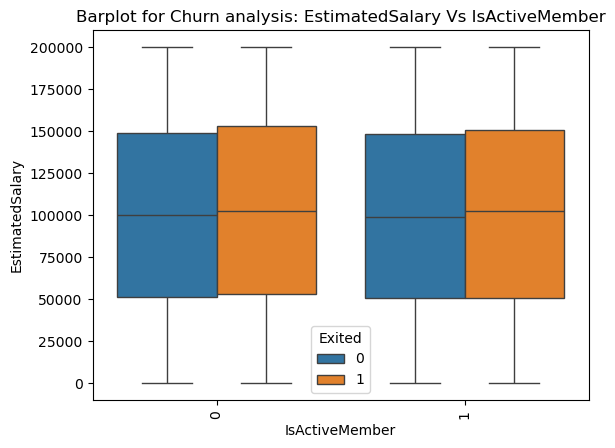

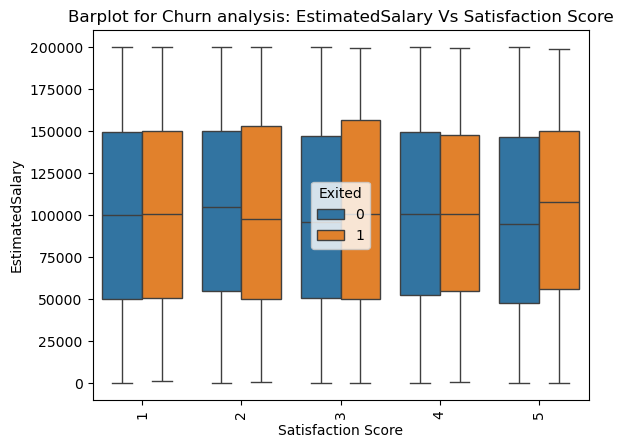

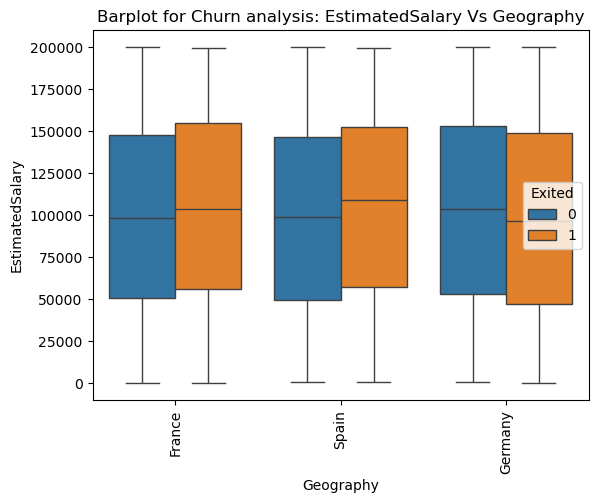

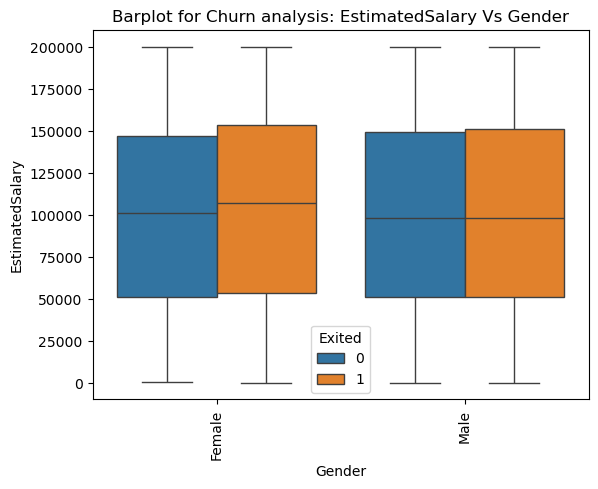

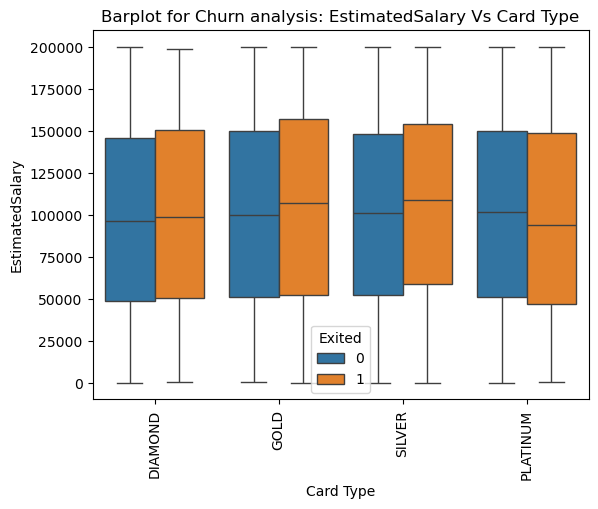

In [63]:
j = 0
for i in range(len(cnv)):
    for j in range(len(ODim)):
        sns.boxplot(data=df, x = ODim[j],y = cnv[i], hue='Exited')
        ttle =  'Barplot for Churn analysis: ' +  cnv[i] +  ' Vs ' + ODim[j]
        plt.xticks(rotation = 90)
        plt.title(ttle)
        plt.show()

In [64]:
MDim   =  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','EstimatedSalary',\
           'Satisfaction Score', 'Point Earned']

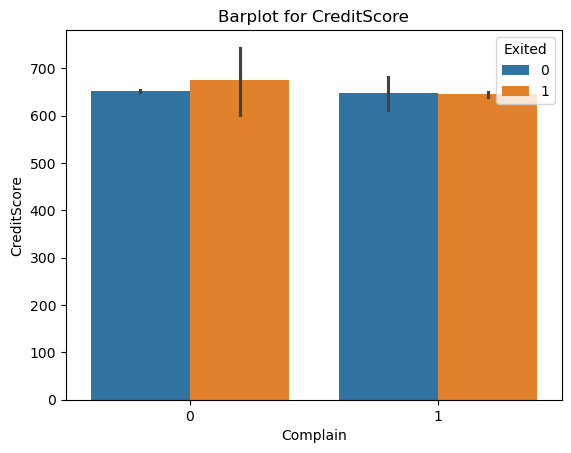

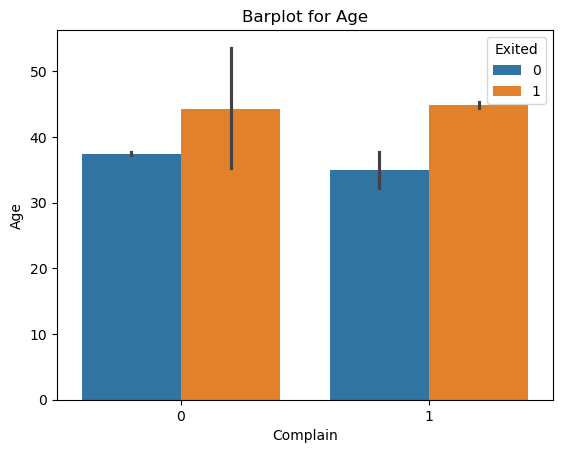

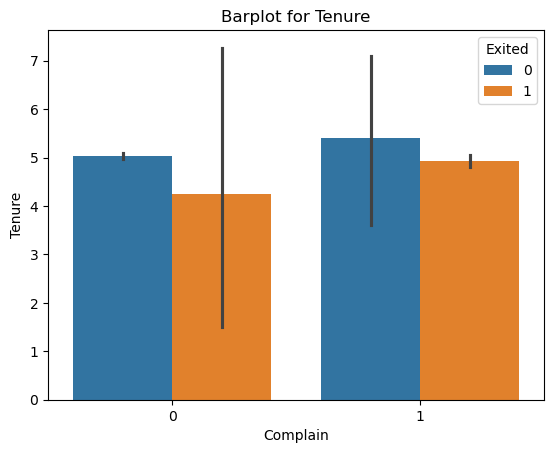

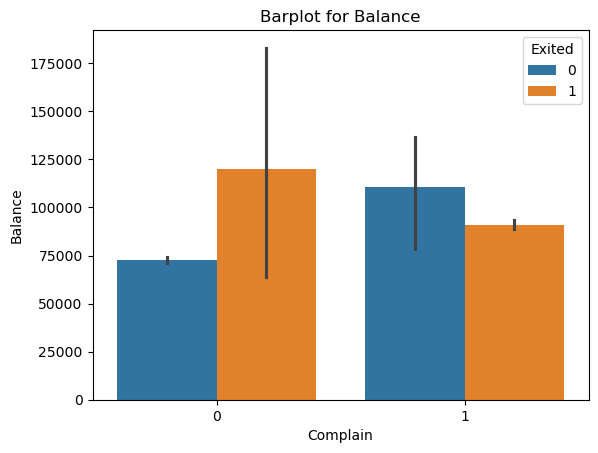

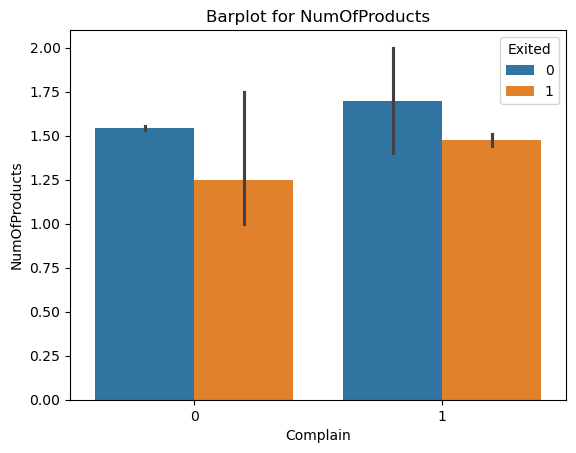

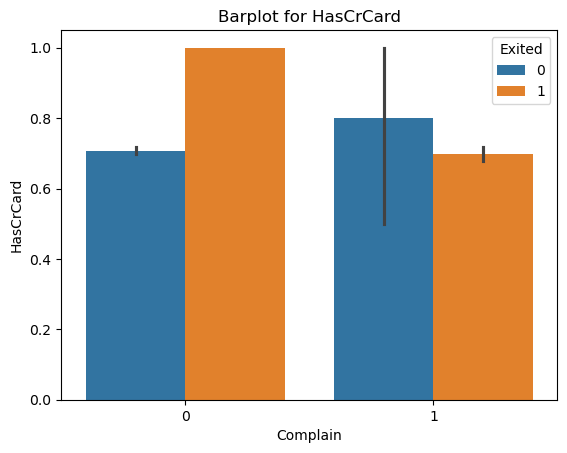

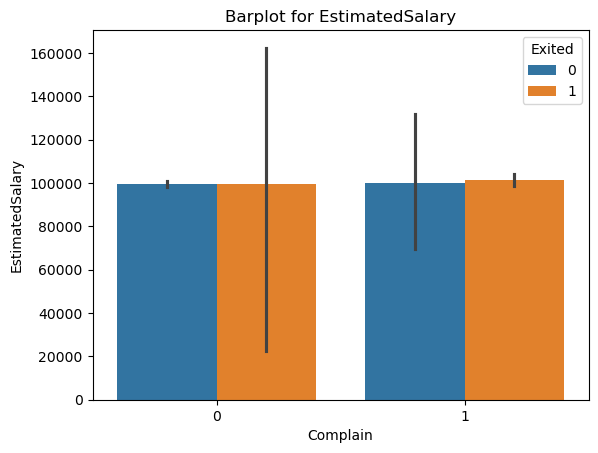

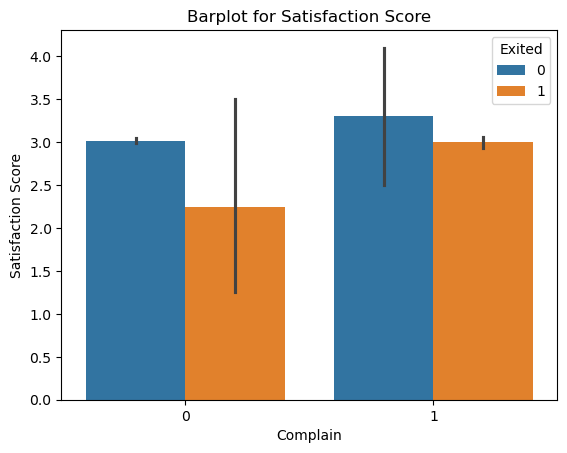

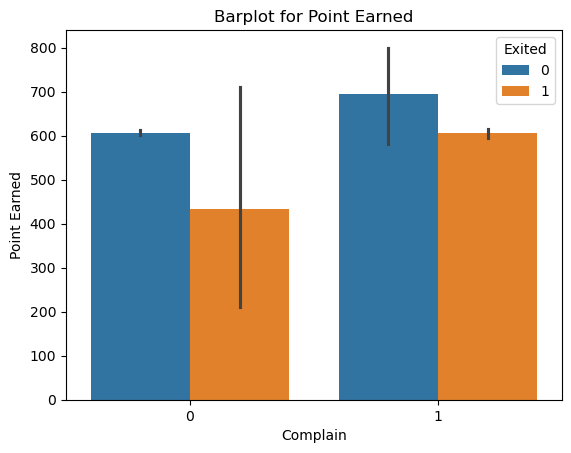

In [65]:
for i in range(len(MDim)):
    sns.barplot(data=df,x = ODim[0],y = MDim[i], hue='Exited')
    ttle =  'Barplot for ' +  MDim[i]
    plt.title(ttle)
    plt.show()

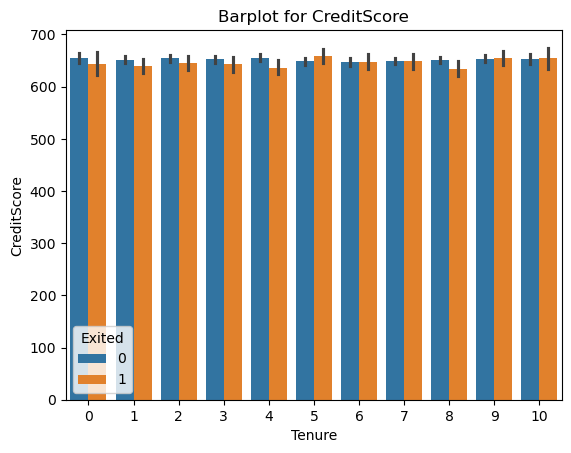

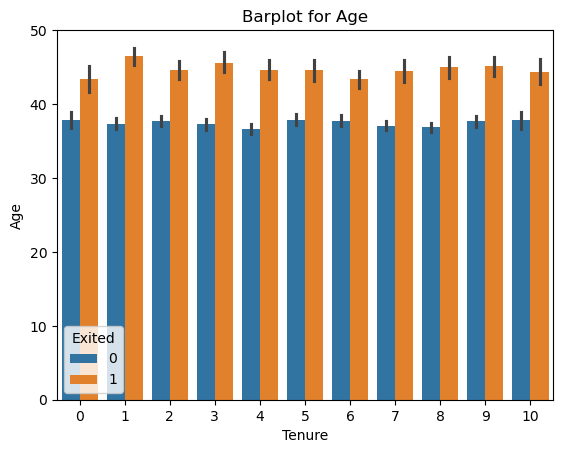

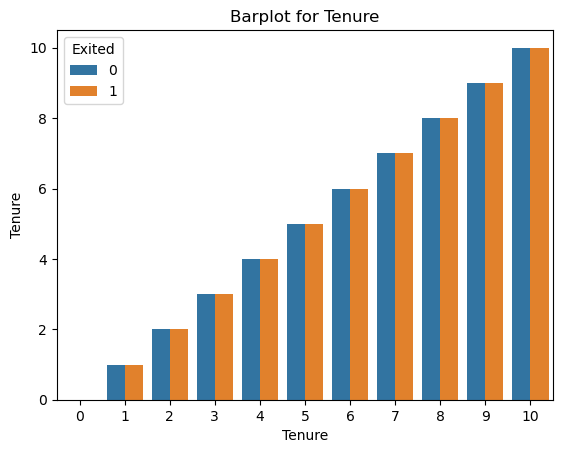

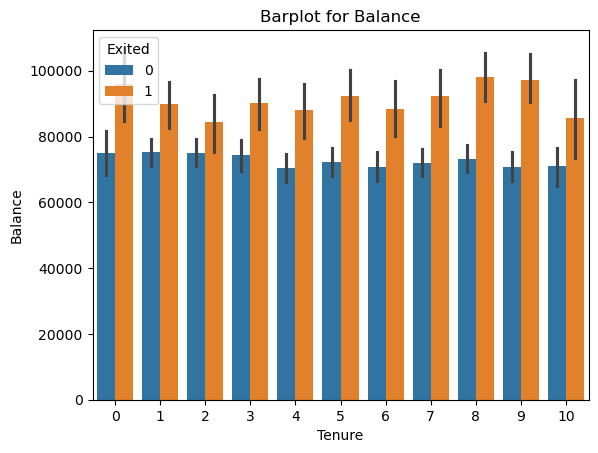

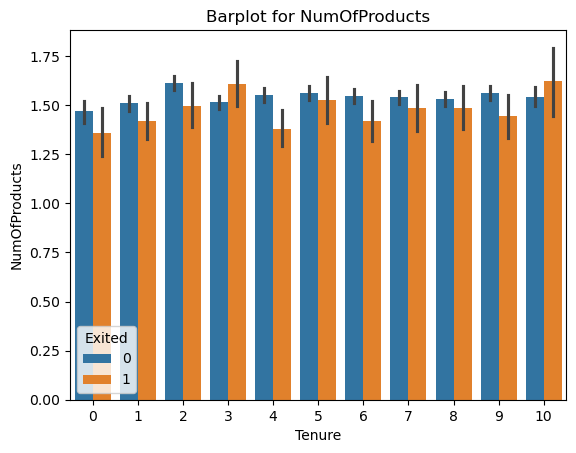

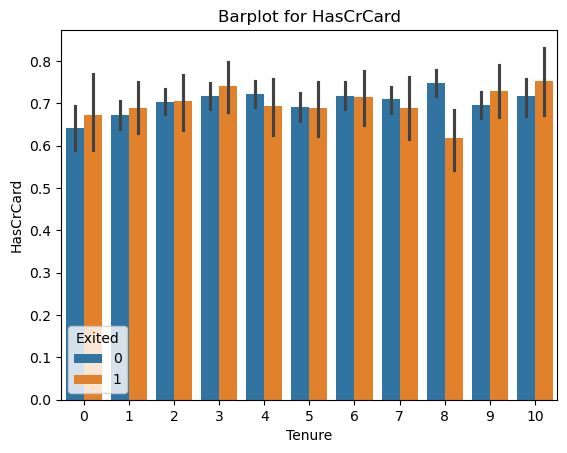

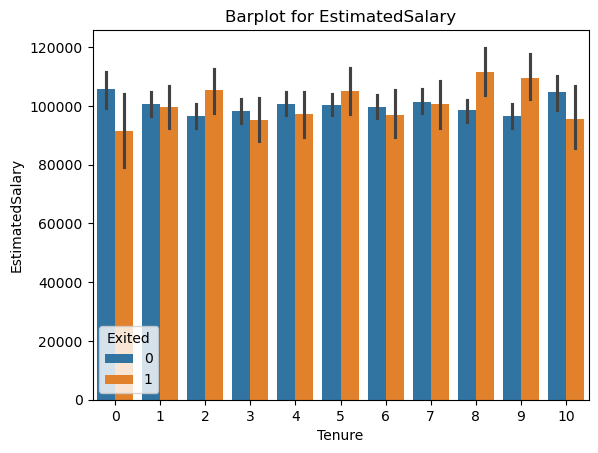

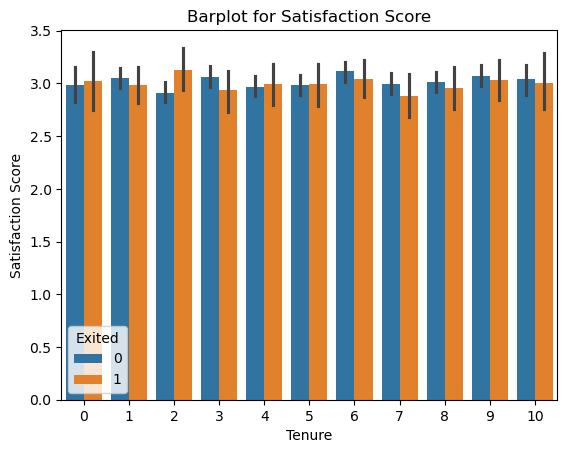

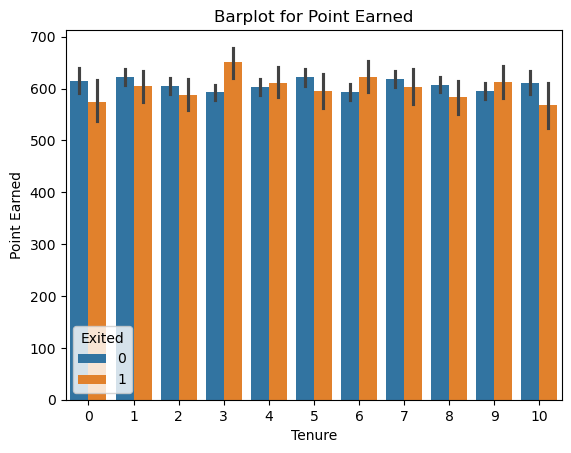

In [66]:
for i in range(len(MDim)):
    sns.barplot(data=df,x = ODim[1],y = MDim[i], hue='Exited')
    ttle =  'Barplot for ' +  MDim[i]
    plt.title(ttle)
    plt.show()

In [67]:
print("Our dataset for further analysis has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

Our dataset for further analysis has 10000 rows and 15 columns


In [68]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### a) multi-collinearity

In [70]:
df_num  = df.select_dtypes(exclude=['string','object'])
numcols = df_num.columns

In [71]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

In [72]:
X   =  df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned']]

In [73]:
vif = calculate_VIF(X)

In [74]:
vif.loc[vif['VIF'] > 5]

,VIF,variable
0,24.041228,CreditScore
1,13.981118,Age
4,7.814943,NumOfProducts
9,5.278663,Satisfaction Score
10,7.539827,Point Earned


In [75]:
vif.loc[vif['VIF'] > 5, 'variable']

0            CreditScore
1                    Age
4          NumOfProducts
9     Satisfaction Score
10          Point Earned
Name: variable, dtype: object

### Observation

The following variables have VIF value more than the threshold value of 5:

* 1              CreditScore
* 2                      Age
* 3            NumOfProducts
* 4       Satisfaction Score
* 5             Point Earned

**We need to remove the highly collinear variables.**

In [78]:
remove_high_vif(X)

dropping 'CreditScore' at index: 0
dropping 'Age' at index: 0
dropping 'Point Earned' at index: 8
dropping 'NumOfProducts' at index: 2
Remaining variables:
Index(['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score'],
      dtype='object')


,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score
0,2,0.00,1,1,101348.88,1,2
1,1,83807.86,0,1,112542.58,1,3
2,8,159660.80,1,0,113931.57,1,3
3,1,0.00,0,0,93826.63,0,5
4,2,125510.82,1,1,79084.10,0,5
...,...,...,...,...,...,...,...
9995,5,0.00,1,0,96270.64,0,1
9996,10,57369.61,1,1,101699.77,0,5
9997,7,0.00,0,1,42085.58,1,3
9998,3,75075.31,1,0,92888.52,1,2


In [79]:
X_  =  X[['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score']]

In [80]:
vif = calculate_VIF(X_)

In [81]:
vif

,VIF,variable
0,3.316212,Tenure
1,2.329828,Balance
2,2.912963,HasCrCard
3,1.942677,IsActiveMember
4,3.298047,EstimatedSalary
5,1.282748,Complain
6,4.086380,Satisfaction Score


In [82]:
vif.loc[vif['VIF'] > 5]

,VIF,variable


Let us get the name of the non-collinear variables.

In [84]:
vif.loc[vif['VIF'] <= 5, 'variable']

0                Tenure
1               Balance
2             HasCrCard
3        IsActiveMember
4       EstimatedSalary
5              Complain
6    Satisfaction Score
Name: variable, dtype: object

### Observation 

The following 7 variables are non-collinear:
1)               Tenure
2)               Balance
3)             HasCrCard
4)        IsActiveMember
5)       EstimatedSalary
6)             Complain
7)    Satisfaction Score

In [86]:
colc      =  df.describe(include="object").columns 
colc

Index(['Geography', 'Gender', 'Exited', 'Card Type'], dtype='object')

In [87]:
Xnames =  ['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score'] 

### b) Distribution of variables

In [89]:
X_   =  df[['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score']]

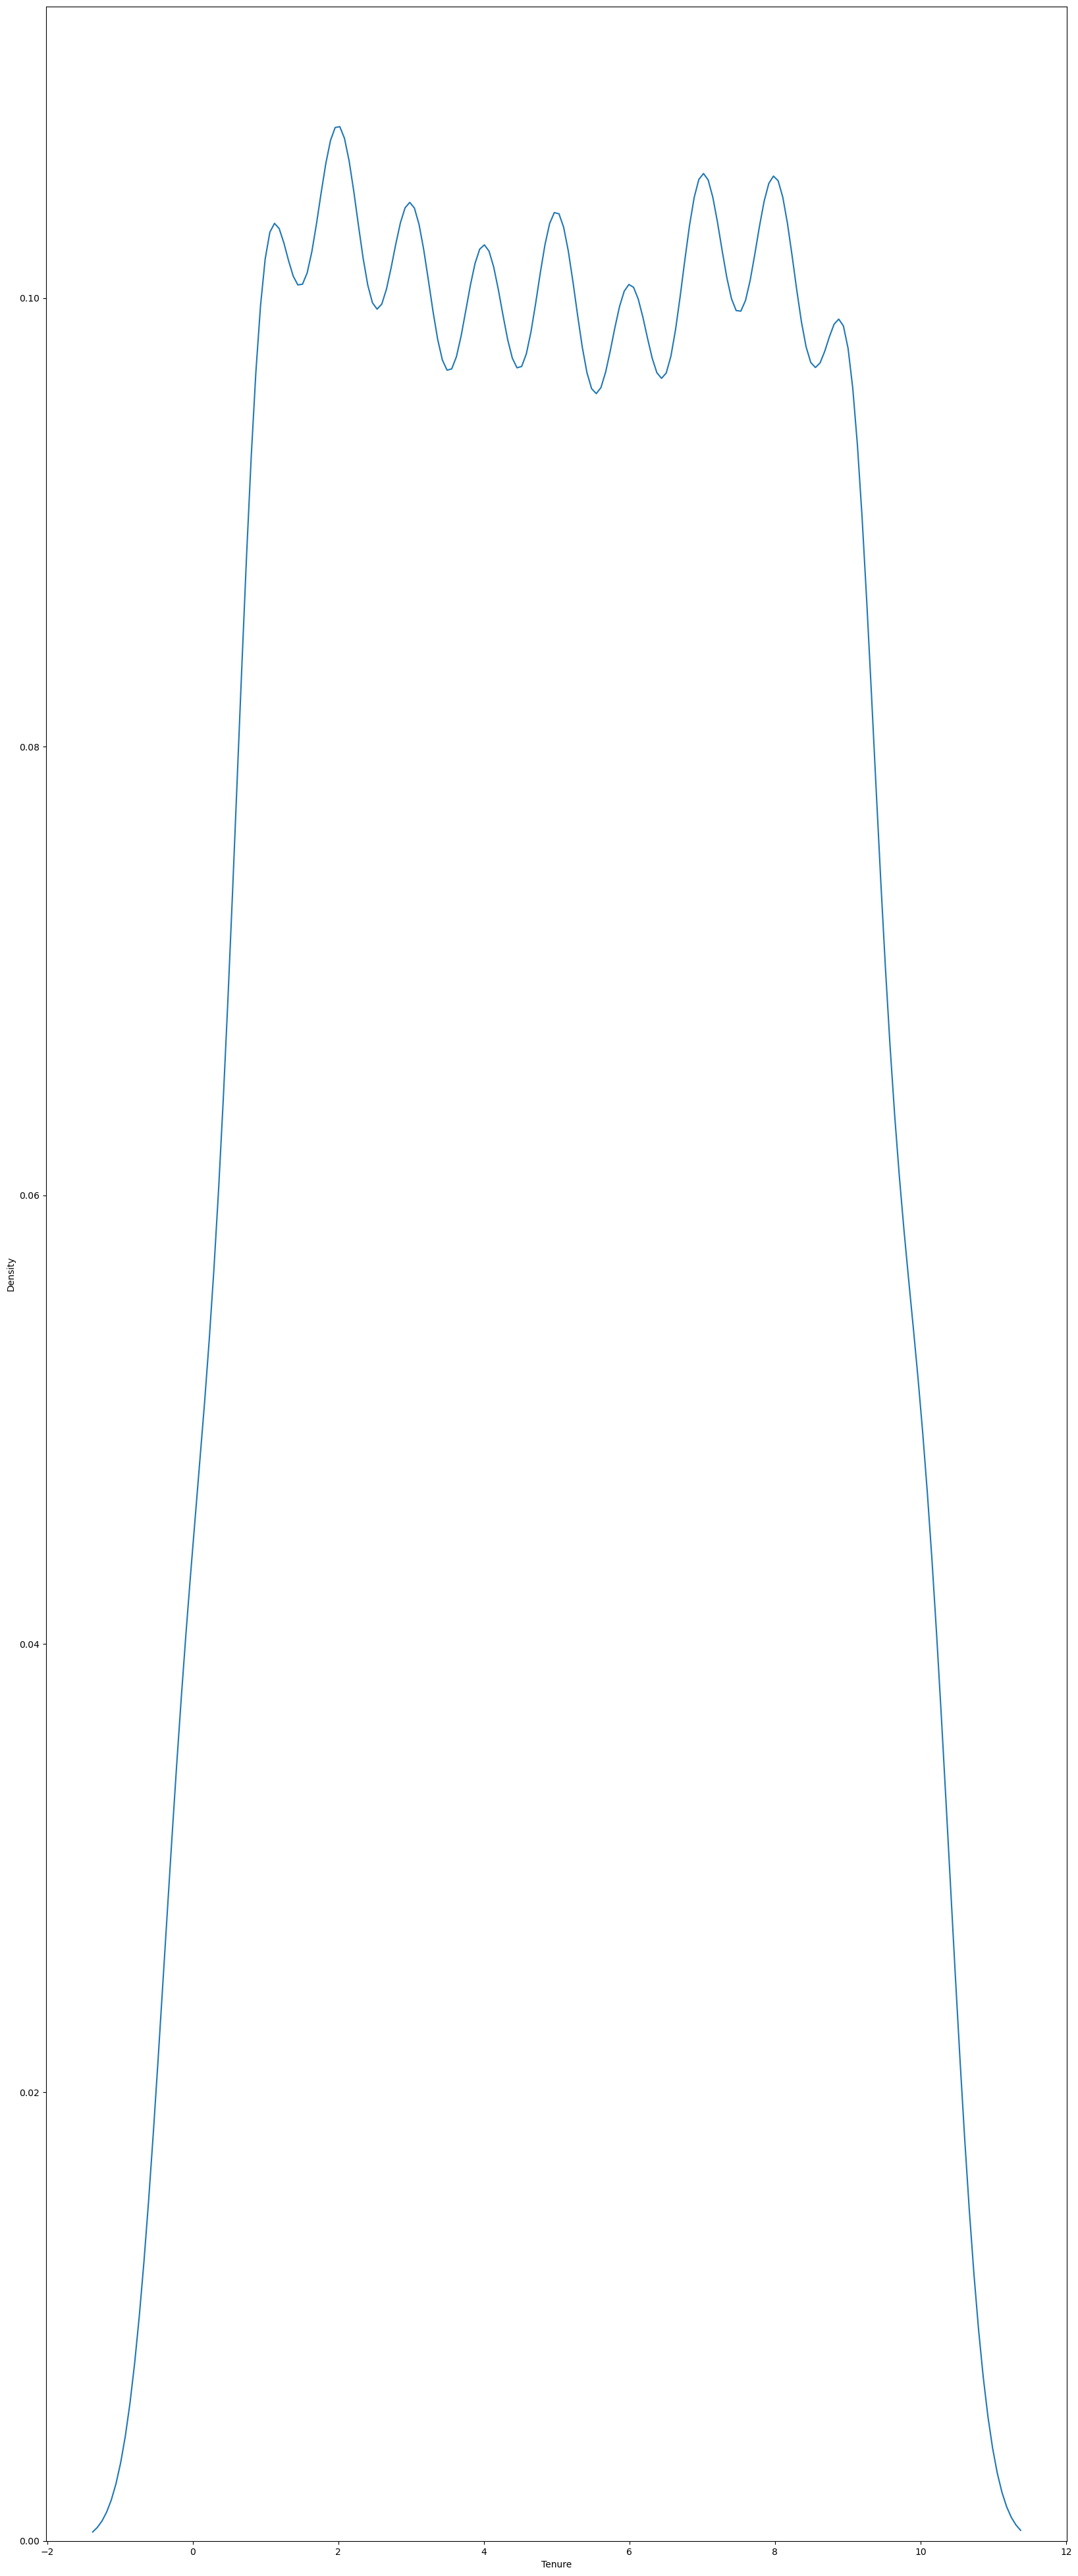

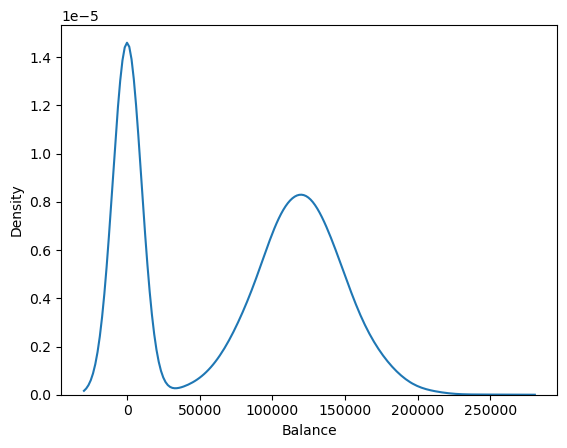

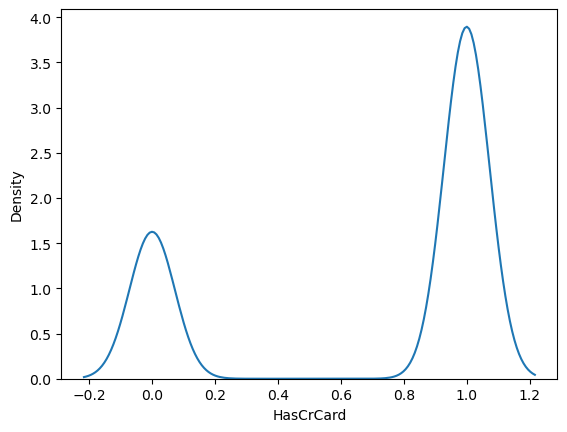

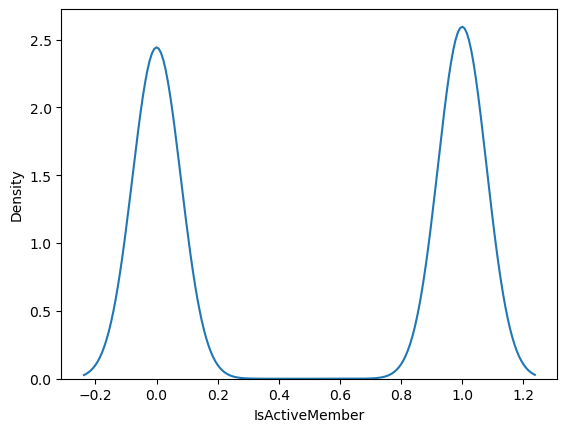

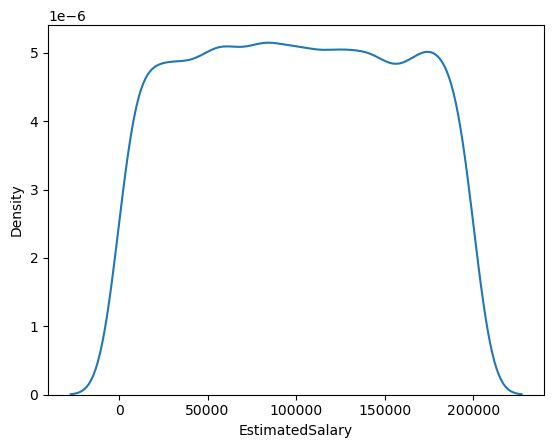

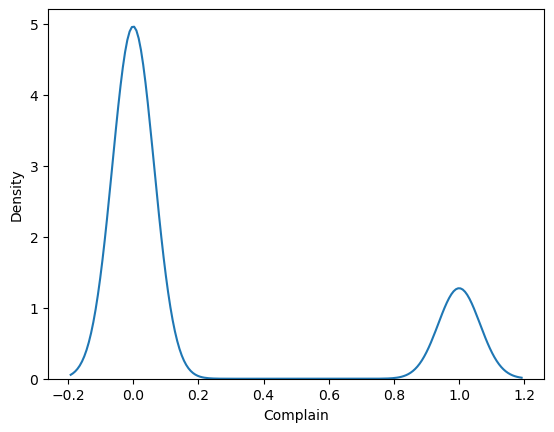

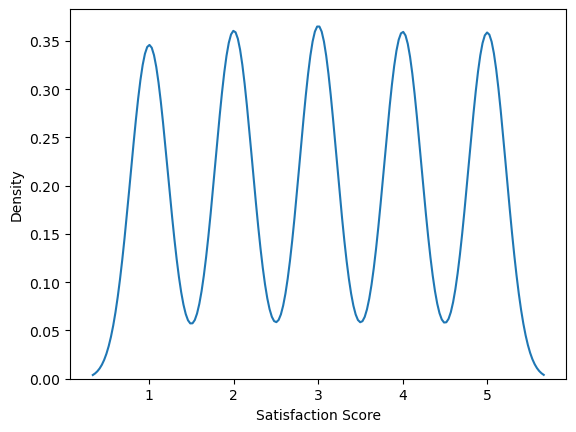

In [90]:
l      =   X_.columns
plt.figure(figsize = (20,50))
for i in range(l.shape[0]):
    sns.kdeplot(X_[l[i]])
    plt.xlabel(l[i])
    plt.show()

### Observation
None of the variables are normally distributed.

### c) Presence of outliers and its treatment

Outliers badly affect mean and standard deviation of the dataset. · It increases the error variance and reduces the power of statistical tests. By applying outlier treatment, machine learning practitioners can handle extreme values effectively. The primary goals of outlier treatment are: Identifying Outliers: Through various statistical methods, such as visualizations and mathematical approaches, outliers can be detected within a dataset.

We are interested to identify the outliers in our continuos numerical variables such as 'Age',  'Balance',  'EstimatedSalary' that affects the mean & standard deviation rather than the discrete numerical variables. Discrete variables are typically categorical, meaning they take on a limited number of values or categories. 

### However, if the outlier is physically possible you should consider it.

### We shall detect outliers in the continuous numerical variables

In [94]:
cnv     = ['Age', 'Balance', 'EstimatedSalary']


Feature :Age Lower_quartile: 14.0 ,Upper_quartile: 62.0 

Max value: 92 Minimum value: 18

Greater than UpperIQR : 359, Less than lower_IQR : 0 ,  zero_count:  0

Variable Age has outliers


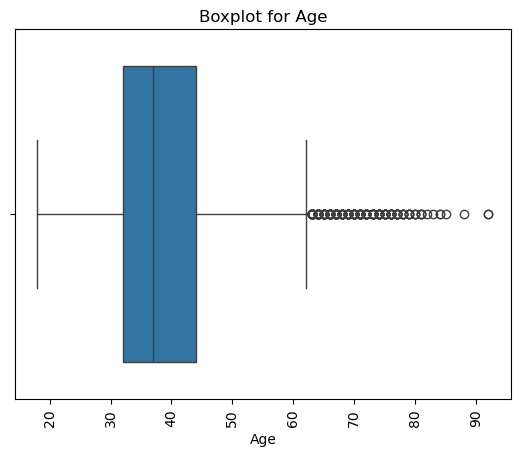


Feature :Balance Lower_quartile: 191466.36000000002 ,Upper_quartile: 319110.60000000003 

Max value: 250898.09 Minimum value: 0.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable Balance has NO outliers


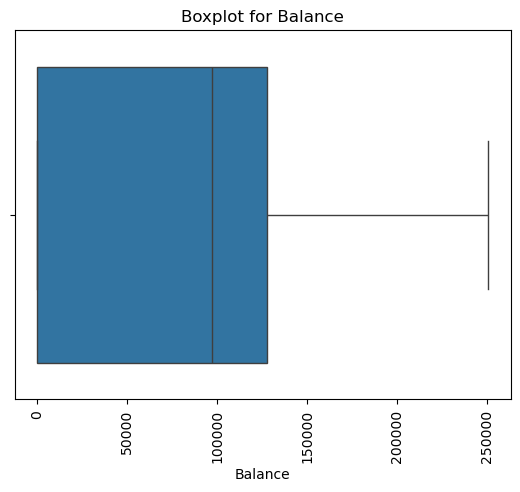


Feature :EstimatedSalary Lower_quartile: 96577.09624999999 ,Upper_quartile: 296967.45375 

Max value: 199992.48 Minimum value: 11.58

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable EstimatedSalary has NO outliers


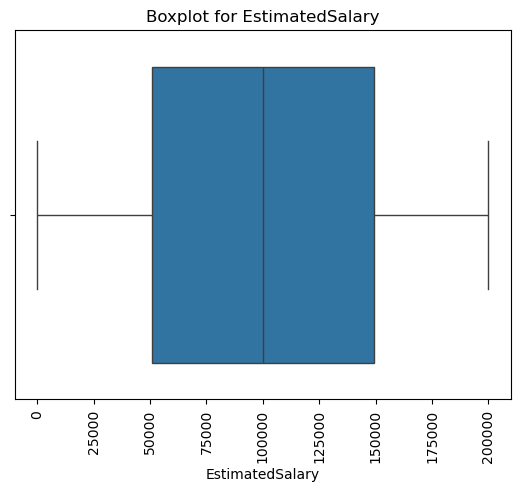

In [95]:
for i in range(len(cnv)):
    identify_outliers(df, cnv[i])

### Observations



We have checked the presence of outliers in the continuous numerical variables ('Age', 'Balance', 'EstimatedSalary').
Only the variable, Age is having the outlier. We observe that the maximum value is 92 and it is a valid & phisically possible value. **Hence, we will retain the outliers for the variable, Age**. 

### d) statistical significance of variables

#### 1 Numerical variables

An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated group of numerical variables to determine if there is a significant difference between the two.

Hypotheses are assumptions about reality whose validity is possible but not yet proven. Two hypotheses are always formulated that assert exactly the opposite. These two hypotheses are the null hypothesis and the alternative hypothesis.

Null hypothesis  𝐻0
  Alternative hypothesis  𝐻1
 

There is no mean difference between the two groups in the population.

Two population means are equal. The two groups are from the same population.  𝐻0
 : μ1 = μ2

Example: There is no difference between each variable of those who churned and who not churned.

There is a mean difference between the two groups in the population.

The two population means are not equal. The two groups are not from the same population.  𝐻1
 : μ1≠ μ2

There is mean difference between the two groups in the population.

#### Observations
Based on the unpaired t test, we find that

**There is a statistically significant difference between the mean values of two groups of the Variable, listed below:**

1) CreditScore 2) Age 3) Balance 4) NumOfProducts 5) IsActiveMember 6) Complain


**There is no statistically significant difference between the mean values of two groups of the Variable, listed below:**
1) Tenure 2) HasCrCard 3) EstimatedSalary 4) Satisfaction Score 5) Point Earned

### Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. 

Null hypothesis: $H_0$: Samples are drawn from normal distribution.
Alternative hypothesis: $H_1$: Samples are NOT drawn from normal distribution. 

We shall conduct normality test for continuous numerical variables.

In [103]:
for  col1 in cnv :
    Shapiro_Wilk(df, col1)

stat=0.944, p=0.000
Age Probably not Gaussian
stat=0.846, p=0.000
Balance Probably not Gaussian
stat=0.957, p=0.000
EstimatedSalary Probably not Gaussian


#### Observations

Based on the Shapiro test for normality, we observe the following: 'Age', 'Balance', 'EstimatedSalary' are not normally dustributed.

###  Calculate Correlation Between Continuous & Binary Target Variable

Point biserial correlation is used to calculate the correlation between a binary categorical variable (a variable that can only take on two values) and a continuous variable and has the following properties:

Point biserial correlation can range between -1 and 1.
For each group created by the binary variable, it is assumed that the continuous variable is normally distributed with equal variances.
For each group created by the binary variable, it is assumed that there are no extreme outliers.

The hypotheses for point biserial correlation thus result in:

Null hypothesis: The correlation coefficient r = 0 (There is no correlation)

Alternative hypothesis: The correlation coefficient r ≠ 0 (There is a correlation)

In [106]:
y    =  df['Exited']
for  col1 in cnv:
    x   =  df[col1]
    pointbiserialr(df, col1, y)

stat=0.285, p=0.000
Age There is a correlation
stat=0.119, p=0.000
Balance There is a correlation
stat=0.012, p=0.212
EstimatedSalary There is no correlation


### Observations

There is **correlation** between the following variables and the Target binary variable:

* 1) Age
* 2) EstimatedSalary

There is **no correlation** between the following variables and the Target binary variable:
1) Balance

### Chi sqaure test of independence

The objective is to determine whether the association between two qualitative variables is statistically significant. The formulation of the hypotheses for this statistical analysis is something like this. 

Null Hypothesis (H0): There is no substantial relationship between the two variables (in case of independence test), or there is no difference

Alternative Hypothesis (H1): There is a substantial relationship between the two variables (in case of independence test), or there is a difference

Read more at: https://analyticsindiamag.com/ai-mysteries/how-to-use-the-chi-square-test-for-two-categorical-variables/

In [109]:
y   =  df['Exited']
i   =  1

In [110]:
colscat         =   ['Geography', 'Gender', 'Card Type']
for  col1 in colscat:
    x   =  df[col1]
    chk_chisq(i, col1)
    i   += 1


1: Variable, Geography

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=300.6264011211942, pvalue=5.245736109572763e-66, dof=2, expected_freq=array([[3992.1468, 1021.8532],
       [1997.6658,  511.3342],
       [1972.1874,  504.8126]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Geography and Target variable are dependent

 ChiSq Stat: 300.6264011211942, P value: 5.245736109572763e-66

2: Variable, Gender

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=112.39655374778587, pvalue=2.9253677618642e-26, dof=1, expected_freq=array([[3617.1366,  925.8634],
       [4344.8634, 1112.1366]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Gender 

### Observation

1) There is a **substantial relationship** between the two variables Geography and Target since chi2_stat = 300.63, p = 5.246 e-66

2) There is a **substantial relationship** between the two variables Gender and Target since chi2_stat = 112.40, p = 2.9254 e-26

3) There is **NO substantial relationship** between the two variables Card Type and Target since chi2_stat = 5.05, p = 0.167941


### e) Class imbalance and its treatment

<Axes: xlabel='Exited'>

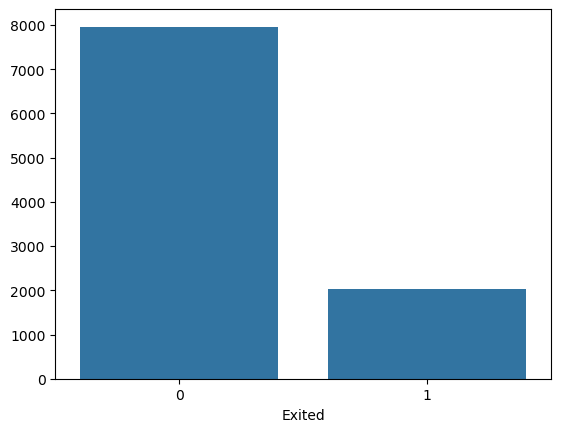

In [113]:
b = y.value_counts()
sns.barplot(x = b.index,y = b.values)

In [114]:
y.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [115]:
y.value_counts(normalize  = True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

### Observations

1. Dataset is **highly imbalanced** as the minority class, ** 1** denoting Exited is having around 20.38% of observations while the other class, **'0'** denoting "Not Exited" is having the balance of 79.62% of the observations.

2. So, we need to choose the model performance measure carefully to avoid bias to the majority class.

3. Precision and recall are common metrics used when evaluating classification models for detection of a certain important class. Recall represents how many samples of the important. class was discovered by the model of all the samples in the class, while precision represents the accuracy of predictions for that certain class. 

In this project, the important class is "Exited". True positives is the number of correctly identified data points of the important class, False positives is the number of data points incorrectly identified as important and False negatives is the number of data points incorrectly identified as not important.

So, we shall use **Recall of the minority class** as our measure of model performance.

### SMOTE

problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

We shall apply SMOTE on training data

### Feature Engineering

#### 1) Whether any transformations required
#### 2) Scaling the data
#### 3) Feature selection 
#### 4) Dimensionality reduction

### 1) Whether any transformations required

Data transformation is used when data needs to be converted to match that of the destination system.


* We need to perform label encoding to make our data suitable for model building.

### Perform Label encoding

In Python Label Encoding, we need to replace the categorical value using a numerical value ranging between zero and the total number of classes minus one. REf: https://www.javatpoint.com/label-encoding-in-python

In [123]:
def  label_enc(df, col):
     colx      =  col + '_code'
     df[colx]   =  my_label.fit_transform(df[col])  

In [124]:
new_df            =   df[['Geography', 'Gender', 'Card Type', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',\
                           'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score','Point Earned' ]]
new_df['Target']  =   df['Exited']

In [125]:
new_df.head().T

,0,1,2,3,4
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Card Type,DIAMOND,DIAMOND,DIAMOND,GOLD,GOLD
CreditScore,619,608,502,699,850
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1


In [126]:
cat_newdf         =  new_df.select_dtypes(exclude=['int64','float64'])
cat_cols          =  cat_newdf.columns
print(cat_cols)

Index(['Geography', 'Gender', 'Card Type', 'Target'], dtype='object')


In [127]:
my_label          =  preprocessing.LabelEncoder()   

for col in cat_cols:
    label_enc(new_df, col)

### 2) Scaling the data

In Data Processing, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

The concept of standardization comes into picture when continuous independent variables are measured at different scales.
https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

Data scaling is applied to numeric columns. In our dataset we have six continuous numerical columns:. 
1) Age
2) Balance
3) EstimatedSalary

The script below filters these **three** columns and removes the remaining columns.

In [131]:
new_df.head().T

,0,1,2,3,4
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Card Type,DIAMOND,DIAMOND,DIAMOND,GOLD,GOLD
CreditScore,619,608,502,699,850
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1


In [132]:
data_numeric = new_df.filter( items = cnv, axis = 1)

data_numeric.head()

,Age,Balance,EstimatedSalary
0,42,0.00,101348.88
1,41,83807.86,112542.58
2,42,159660.80,113931.57
3,39,0.00,93826.63
4,43,125510.82,79084.10


Let’s plot some statistical values for the columns in our dataset using the describe() method.

In [134]:
data_numeric.describe()

,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000
mean,38.921800,76485.889288,100090.239881
std,10.487806,62397.405202,57510.492818
min,18.000000,0.000000,11.580000
25%,32.000000,0.000000,51002.110000
50%,37.000000,97198.540000,100193.915000
75%,44.000000,127644.240000,149388.247500
max,92.000000,250898.090000,199992.480000


### Robust Scaling

To scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common preprocessing for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, using the median and the interquartile range often give better results. For an example visualization and comparison to other scalers, refer to Compare RobustScaler with other scalers.

In [136]:
from sklearn.preprocessing import RobustScaler

transformer           =  RobustScaler().fit(data_numeric)

data_numeric_robust   =  transformer.transform(data_numeric)

Similarly, the script below converts the NumPy array returned by the fit_transform() to a Pandas Dataframe which contains our normalized values between 0 and 1.

In [138]:
data_numeric_robust_df  = pd.DataFrame(data_numeric_robust,
                              columns = data_numeric.columns)
data_numeric_robust_df.head()

,Age,Balance,EstimatedSalary
0,0.416667,-0.761480,0.011739
1,0.333333,-0.104906,0.125512
2,0.416667,0.489346,0.139630
3,0.166667,-0.761480,-0.064717
4,0.500000,0.221806,-0.214561


###  Feature selection

## Automatically select the number of features

The RFE method is available via the RFE class in scikit-learn.

RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

It can then be applied to the dataset by calling the transform() function.

In [141]:
###
### We need to remove the not-standardized 3 columns and add standardised 3 columns
###
new_df.drop('Age', axis = 1, inplace = True)
new_df.drop('Balance', axis = 1, inplace = True)
new_df.drop('EstimatedSalary', axis = 1, inplace = True)
new_df.drop('Target', axis = 1, inplace = True)

new_df['Age']                              =  data_numeric_robust_df['Age']
new_df['Balance']                          =  data_numeric_robust_df['Balance']
new_df['EstimatedSalary']                  =  data_numeric_robust_df['EstimatedSalary']


In [142]:
y             =    new_df['Target_code']
X             =    new_df.drop(['Target_code'], axis = 1)                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (10000, 17)
y dimension (10000,)


In [143]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geography           10000 non-null  object 
 1   Gender              10000 non-null  object 
 2   Card Type           10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   Complain            10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Geography_code      10000 non-null  int32  
 12  Gender_code         10000 non-null  int32  
 13  Card Type_code      10000 non-null  int32  
 14  Target_code         10000 non-null  int32  
 15  Age                 10000 non-null  float64
 16  Balan

In [144]:
new_df.columns

Index(['Geography', 'Gender', 'Card Type', 'CreditScore', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_code', 'Gender_code',
       'Card Type_code', 'Target_code', 'Age', 'Balance', 'EstimatedSalary'],
      dtype='object')

In [145]:
new_df.dtypes

Geography              object
Gender                 object
Card Type              object
CreditScore             int64
Tenure                  int64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_code          int32
Gender_code             int32
Card Type_code          int32
Target_code             int32
Age                   float64
Balance               float64
EstimatedSalary       float64
dtype: object

### Create the list of independent variables

#### 1) Non-collinear independent variables
1)               Tenure
2)               Balance
3)             HasCrCard
4)        IsActiveMember
5)       EstimatedSalary
6)             Complain
7)    Satisfaction Score
#### 2) Add  label encoded categorical variables
8) Geography_code
9) Gender_code
10) Card Type_code
  

In [147]:
X              =   new_df[['Tenure','Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',\
                   'Geography_code','Gender_code','Card Type_code']]

In [148]:
y             =    new_df['Target_code']
                
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (10000, 10)
y dimension (10000,)


In [149]:
# create pipeline
rfe                    =     RFE(estimator = RandomForestClassifier(), n_features_to_select = 5)
model                  =     RandomForestClassifier(random_state = 42)
pipeline               =     Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv                     =    RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores               =    cross_val_score(pipeline, X, y, scoring = 'balanced_accuracy', cv = cv, n_jobs = -1, error_score = 'raise')


In [150]:
# report performance
print('balanced_accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

balanced_accuracy: 0.998 (0.002)


### Observation

we can see the RFE that uses a Random Forest and selects 15 features and then fits a model on the selected features achieves a balanced accuracy of about 96.2 %. 

**Balanced accuracy** in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

Fit an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

In [153]:
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 6.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 4.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 3.000
Column: 9, Selected False, Rank: 5.000


In [154]:
x_names   =   X.columns
for i in range(X.shape[1]):
     namex    =  x_names[i]
     print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: Tenure Selected False, Rank: 2.000
Column: 1, Name: Balance Selected True, Rank: 1.000
Column: 2, Name: HasCrCard Selected False, Rank: 6.000
Column: 3, Name: IsActiveMember Selected True, Rank: 1.000
Column: 4, Name: EstimatedSalary Selected True, Rank: 1.000
Column: 5, Name: Complain Selected True, Rank: 1.000
Column: 6, Name: Satisfaction Score Selected False, Rank: 4.000
Column: 7, Name: Geography_code Selected True, Rank: 1.000
Column: 8, Name: Gender_code Selected False, Rank: 3.000
Column: 9, Name: Card Type_code Selected False, Rank: 5.000


In [155]:
selected_X  =   []
print(selected_X)

[]


In [156]:
for i in range(X.shape[1]):
     namex    =  x_names[i]
     if (rfe.support_[i] == True):
         selected_X.append(namex)
         print(selected_X)
         print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))
print("\nSelected important features {}".format(selected_X))

['Balance']
Column: 1, Name: Balance Selected True, Rank: 1.000
['Balance', 'IsActiveMember']
Column: 3, Name: IsActiveMember Selected True, Rank: 1.000
['Balance', 'IsActiveMember', 'EstimatedSalary']
Column: 4, Name: EstimatedSalary Selected True, Rank: 1.000
['Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain']
Column: 5, Name: Complain Selected True, Rank: 1.000
['Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Geography_code']
Column: 7, Name: Geography_code Selected True, Rank: 1.000

Selected important features ['Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Geography_code']


In [157]:
selected_X

['Balance', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Geography_code']

### Observation

We have selected 5 features which are important in predicting the target variable.

**We shall use this data for our model building.**

In [159]:
X_   =    X.loc[:, selected_X]

In [160]:
X_.shape

(10000, 5)

In [161]:
time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:01:00.324634


###  Dimensionality reduction

Since we have selected top 5 variables affecting the dependent variable, our dataset is Not Huge. We are not going to apply dimensionality reduction such as Principal Component Analysis or Factor Analysis etc.

We use PCA when you have high-dimensional data to reduce its dimensionality while preserving most of the variance, simplifying analysis and visualization.

### Create a file for the processed data

In [165]:
# get current date and time
current_datetime     =  datetime.now().strftime("%Y-%m-%d %H-%M-%S")
print("Current date & time : ", current_datetime)
# convert datetime obj to string
str_current_datetime = str(current_datetime)
# create a file object along with extension
file_name_X           = r"E:\DSE-FT-C-May24-G5\Data\Processed_data_X_" + str_current_datetime + ".csv"
file_name_y           = r"E:\DSE-FT-C-May24-G5\Data\Processed_data_y_" + str_current_datetime + ".csv"
X_.to_csv(file_name_X , index = False)
y.to_csv(file_name_y , index = False)

Current date & time :  2024-11-19 12-25-04
